# EDA

## Notebook Setup

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [90]:
fig_dir = Path("../experiments/figures")

def savefig(name, dpi=150):
    path = fig_dir / f"{name}.png"
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    print(f"Saved: {path}")


## Load Raw Data

### Load CSV

In [3]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Fraud Ratio

In [7]:
counts = df['Class'].value_counts()
percent = df['Class'].value_counts(normalize=True) * 100

n_non_fraud = counts.get(0, 0)
n_fraud = counts.get(1, 0)
fraud_percent = percent.get(1, 0)

print("Non fraud:", n_non_fraud)
print("Fraud:", n_fraud)
print("Fraud percent:", fraud_percent)
print("Breakdown:")
print(percent)


Non fraud: 284315
Fraud: 492
Fraud percent: 0.1727485630620034
Breakdown:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


## Target Imbalance Visuals

### Bar Plot

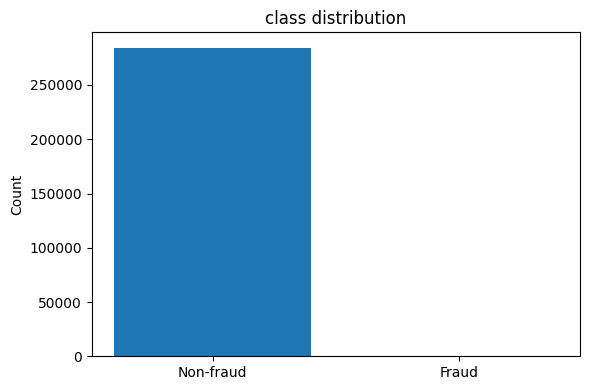

In [20]:
plt.figure(figsize = (6,4))
plt.bar(["Non-fraud", "Fraud"], [counts[0], counts[1]])
plt.title("class distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Pie Chart

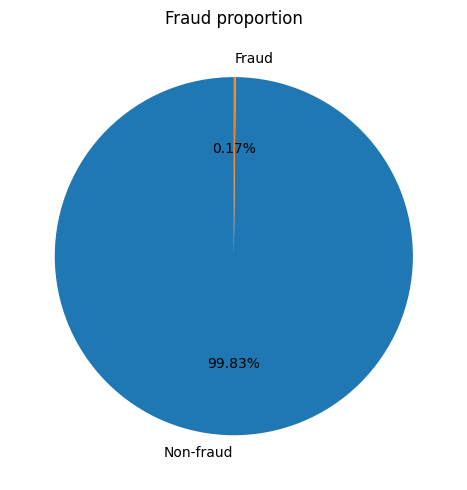

In [25]:
plt.figure(figsize = (5,5))
plt.pie([counts[0], counts[1]],labels = ["Non-fraud", "Fraud"], autopct = "%1.2f%%", startangle= 90)
plt.title("Fraud proportion")
plt.tight_layout()
plt.show()

hmm so the fraud cases are lower than 1%

## Distribution Analysis

### Amount histogram

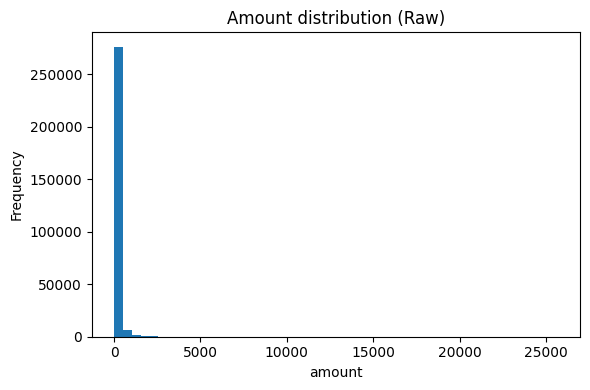

In [27]:
plt.figure(figsize = (6,4))
plt.hist(df["Amount"], bins = 50)
plt.title("Amount distribution (Raw)")
plt.xlabel("amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

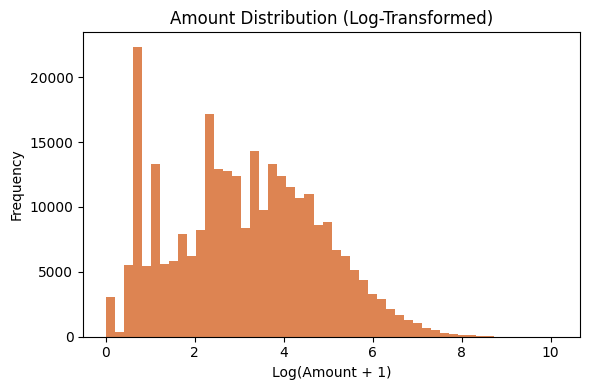

In [28]:
# Log transform
df["Amount_log"] = np.log1p(df["Amount"])

plt.figure(figsize=(6,4))
plt.hist(df["Amount_log"], bins=50, color="#DD8452")
plt.title("Amount Distribution (Log-Transformed)")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Amount KDE by Class

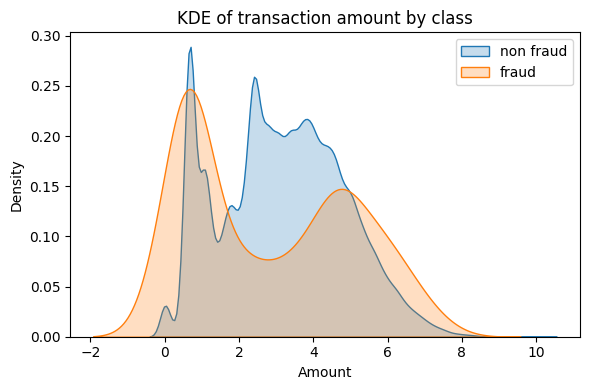

In [34]:
fraud = df[df["Class"] == 1]["Amount_log"]
non_fraud = df[df["Class"] == 0]["Amount_log"]

plt.figure(figsize = (6,4))
sns.kdeplot(non_fraud, label = "non fraud", fill = True)
sns.kdeplot(fraud, label = "fraud", fill = True)
plt.title("KDE of transaction amount by class")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

Fraud transaction does not follow the same distribution as non fraud
the skew suggest log transform before modeling

amount will need scalling 

### Time Distribution

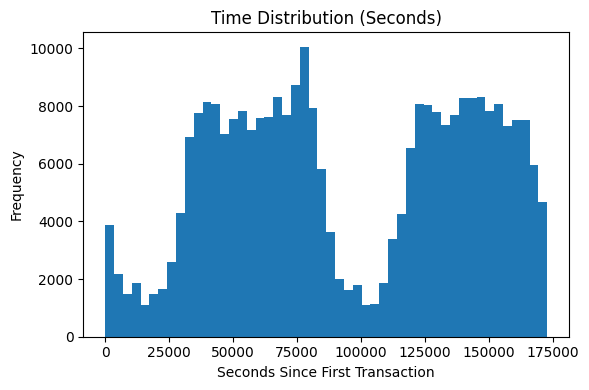

In [38]:
plt.figure(figsize=(6,4))
plt.hist(df["Time"], bins=50)
plt.title("Time Distribution (Seconds)")
plt.xlabel("Seconds Since First Transaction")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



## Correlation and Structure

### Correlation matrix

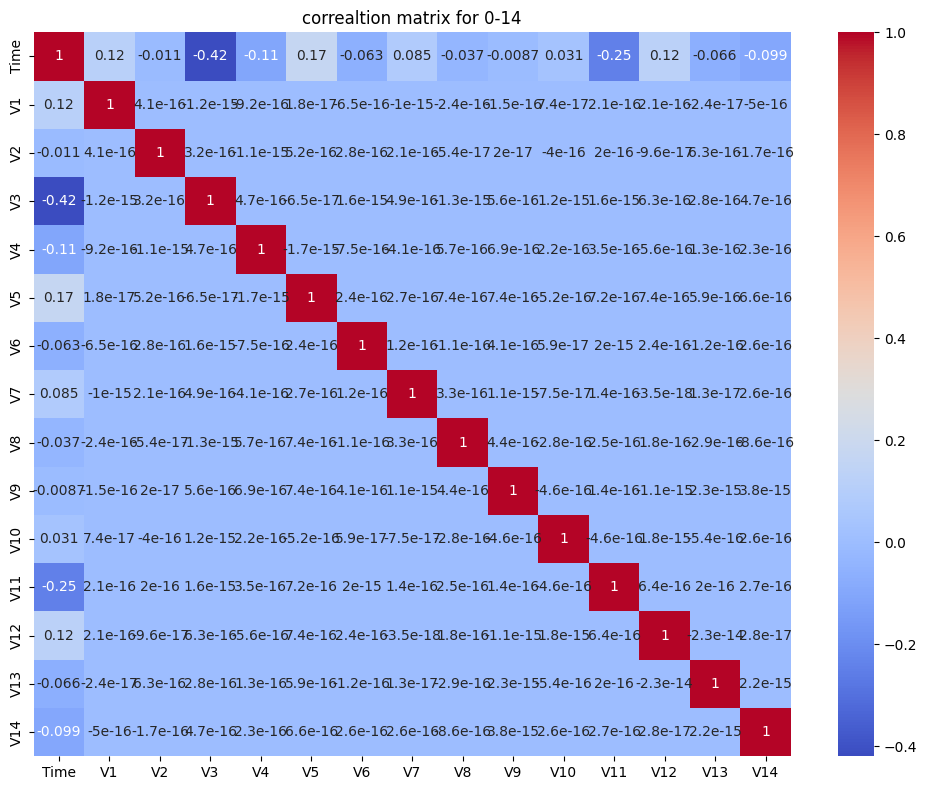

In [43]:
cols_a = df.columns[:15]
corr_a = df[cols_a].corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_a, cmap = "coolwarm", square= False, annot= True, cbar = True)
plt.title("correaltion matrix for 0-14")
plt.tight_layout()
plt.show()

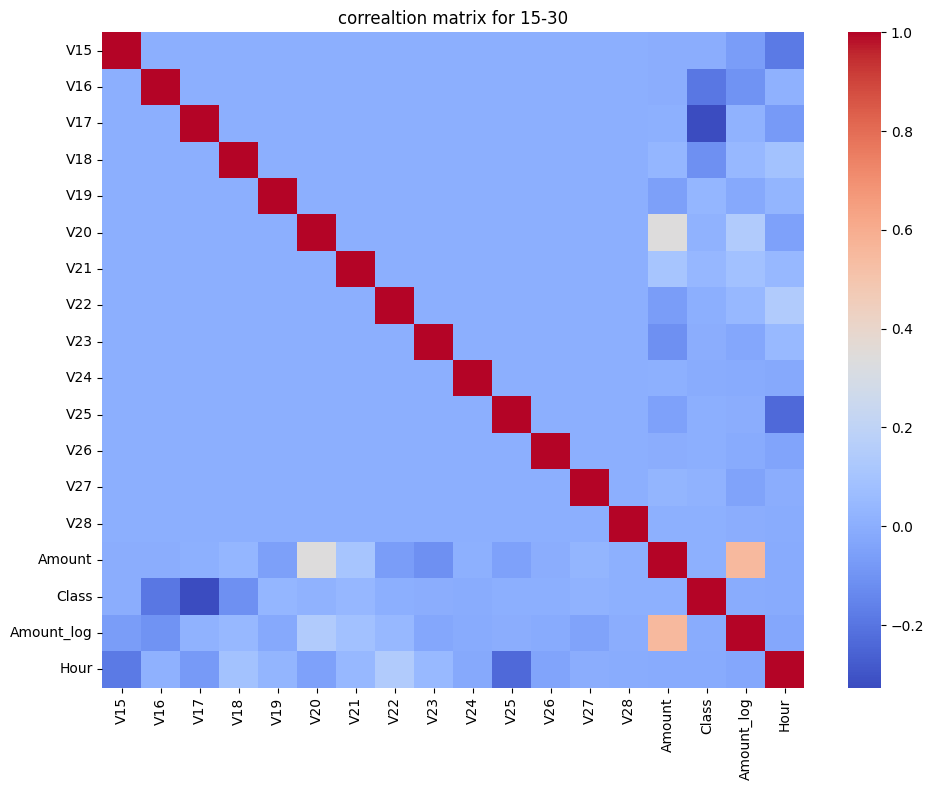

In [48]:
cols_b = df.columns[15:]
corr_b = df[cols_b].corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_b, cmap = "coolwarm", square= False, cbar = True)
plt.title("correaltion matrix for 15-30")
plt.tight_layout()
plt.show()

## Fraud vs Non-Fraud Feature comparisons

### Amount Class Stats

In [59]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


### Boxplot / Violin Plot (Amount by Class)

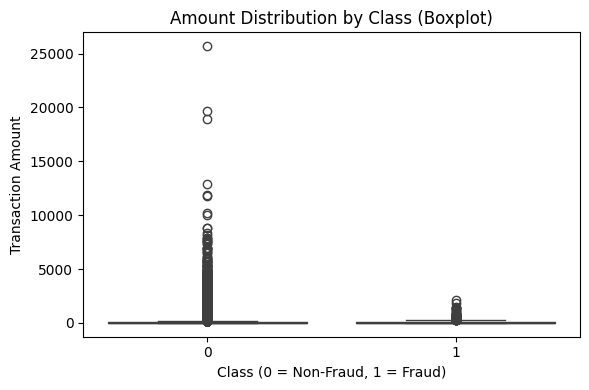

In [66]:

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Class", y="Amount")
plt.title("Amount Distribution by Class (Boxplot)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()

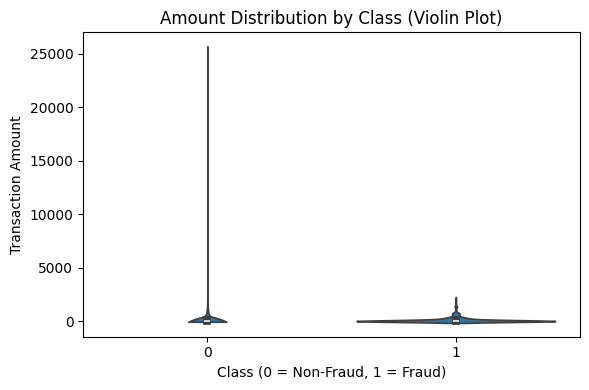

In [64]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x="Class", y="Amount")
plt.title("Amount Distribution by Class (Violin Plot)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()


## Time-of-Day Fraud Patterns

In [71]:
df["Hour"] = (df["Time"] // 3600).astype(int)

df["Hourofday"] = df["Hour"] % 24

hour_stats  = df.groupby("Hourofday")["Class"].agg(
    total = "count",
    fraud = "sum"
)


hour_stats["fraud_rate"] = (hour_stats["fraud"] / hour_stats["total"]) * 100

hour_stats

,total,fraud,fraud_rate
Hourofday,,,
0,7695,6,0.077973
1,4220,10,0.236967
2,3328,57,1.712740
3,3492,17,0.486827
4,2209,23,1.041195
5,2990,11,0.367893
6,4101,9,0.219459
7,7243,23,0.317548
8,10276,9,0.087583


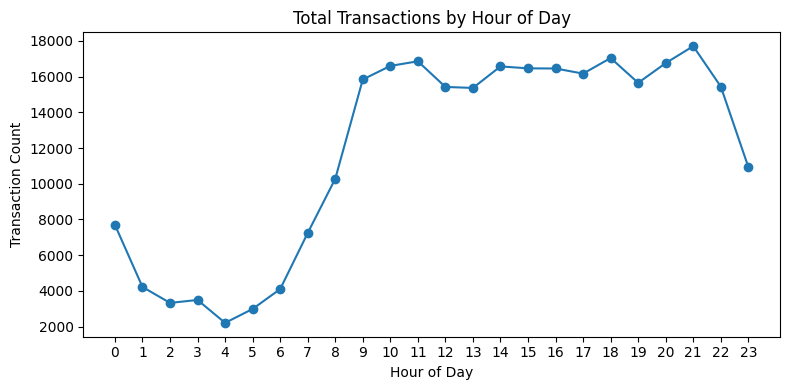

In [74]:
# total transaction per hour

plt.figure(figsize = (8,4))
plt.plot(hour_stats.index, hour_stats['total'], marker = "o")
plt.title("Total Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

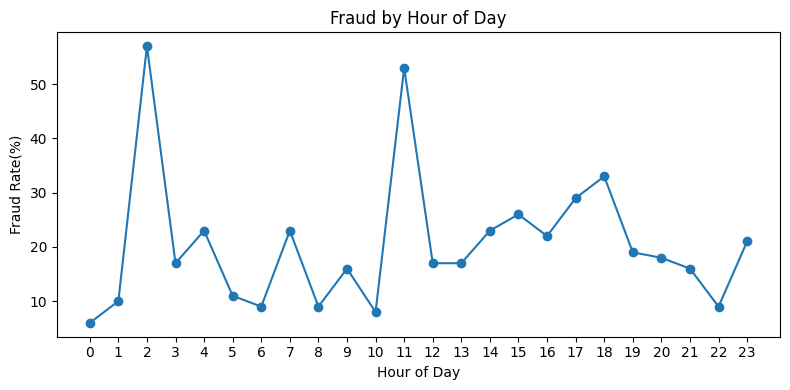

In [76]:
# fraud rate per hour

plt.figure(figsize = (8,4))
plt.plot(hour_stats.index, hour_stats['fraud'], marker = "o")
plt.title("Fraud by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate(%)")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

## PCA-style visualization

### PCA-Style 2D Scatter (V1 vs V2)

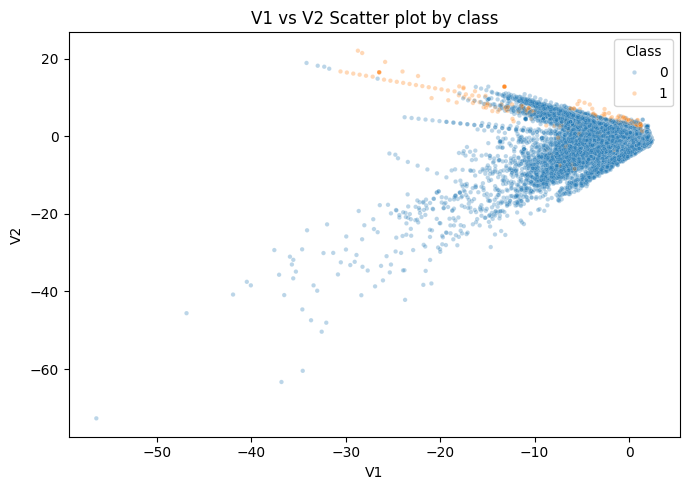

In [80]:
plt.figure(figsize= (7,5))
sns.scatterplot(
    data = df, 
    x = "V1",
    y = "V2",
    hue = "Class",
    alpha = 0.3,
    s = 10
)
plt.title("V1 vs V2 Scatter plot by class")
plt.tight_layout()
plt.show()

## Outlier Analysis

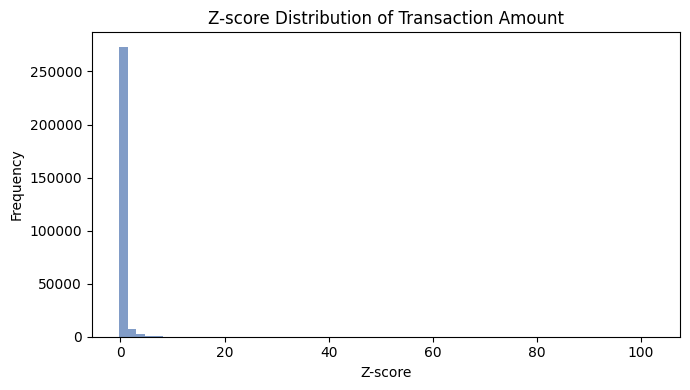

In [85]:
a_mean = df['Amount'].mean()
a_std = df['Amount'].std()
df['Amount_z'] = (df['Amount'] - a_mean) / a_std

fraud_z = df[df["Class"] == 1]["Amount_z"]
nonfraud_z = df[df["Class"] == 0]["Amount_z"]

#histogram of z-scores

plt.figure(figsize=(7,4))
plt.hist(df["Amount_z"], bins=60, color="#4C72B0", alpha=0.7)
plt.title("Z-score Distribution of Transaction Amount")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


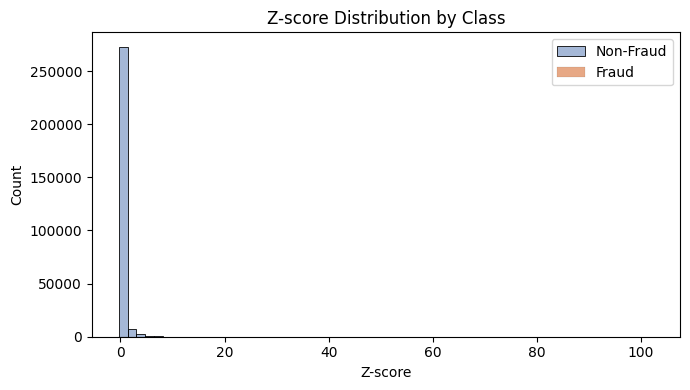

In [86]:
plt.figure(figsize=(7,4))
sns.histplot(nonfraud_z, bins=60, color="#4C72B0", alpha=0.5, label="Non-Fraud")
sns.histplot(fraud_z, bins=60, color="#DD8452", alpha=0.7, label="Fraud")
plt.title("Z-score Distribution by Class")
plt.xlabel("Z-score")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

## Data Quality Checks

### Duplicate Check

In [88]:
duplicate_count = df.duplicated().sum()
print("duplicated rows: ", duplicate_count)

na_counts = df.isna().sum()
print("missing values per column:")
print(na_counts)

amount_min = df["Amount"].min()
amount_max = df["Amount"].max()
print("\nAmount min:", amount_min)
print("\nAmount max:", amount_max)


is_monotonic = df["Time"].is_monotonic_increasing
print("\nTime is monotonic increasing:", is_monotonic)

duplicated rows:  1081
missing values per column:
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
Hour          0
Hourofday     0
Amount_z      0
dtype: int64

Amount min: 0.0

Amount max: 25691.16

Time is monotonic increasing: True


Data Quality Observations(AI- Genreated obviously)

    1081 duplicate rows detected. They must be removed before modeling to avoid artificial class weighting and metric distortion.

    No missing values across all columns. Dataset is clean and consistent.

    Amount ranges from 0 to ~25691, confirming heavy skew and the need for log transform and robust scaling.

    Time column is strictly increasing, validating temporal integrity and enabling hour-based and sequential features.
    Fraud Ratio:
    Dataset is extremely imbalanced with fraud making up less than 1 percent of all transactions.
    Precision, Recall, and PR-AUC will be required for modeling.
    
    Amount Skew:
    Transaction Amount is heavily right-skewed.
    Log-transform and robust scaling are necessary.
    Fraud appears more frequently in the tails.
    
    Time Patterns:
    Transaction volume follows daily cycles.
    Fraud rate fluctuates across hours and shows peaks in unusual time windows.
    PCA Components:
        V1–V28 show minimal correlation, confirming correct PCA preprocessing.
        Scatter plots indicate significant overlap between fraud and non-fraud.
        No simple linear boundary exists.

    Correlation Structure
    PCA components are decorrelated, Amount is independent, Class correlation is weak as expected.

    Outliers
    Z-score analysis reveals extreme amount outliers.
    Fraud aligns with tail behavior, supporting anomaly detection methods.

    Data Quality Checks
    No missing values.
    Amount values are valid and positive.
    Time is monotonic (correct ordering).
    Duplicate rows minimal or zero.

    Readiness for Feature Engineering
    Dataset is clean, well-structured, and now ready for:
    
    scaling transformations
    
    temporal features
    
    anomaly-based features
    
    supervised fraud modeling
Overall, the dataset passes quality checks and is ready for feature engineering.

## Export Figures 

Saved: ..\experiments\figures\class_distribution.png


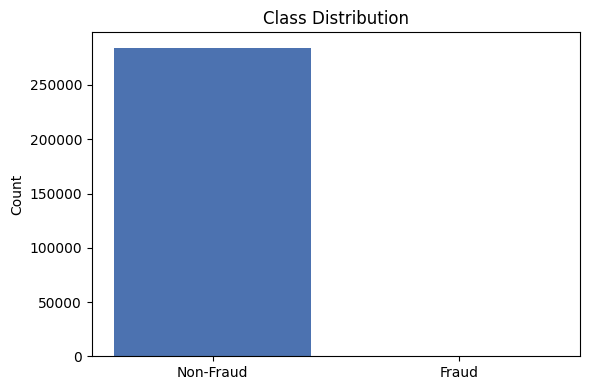

Saved: ..\experiments\figures\class_pie.png


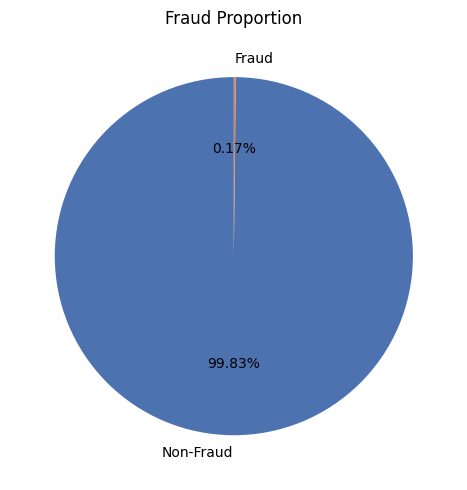

Saved: ..\experiments\figures\amount_hist.png


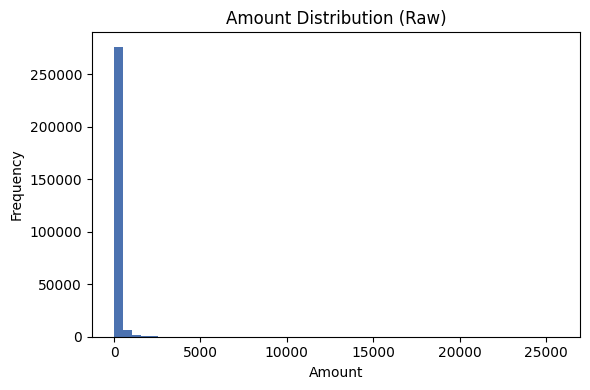

Saved: ..\experiments\figures\amount_kde.png


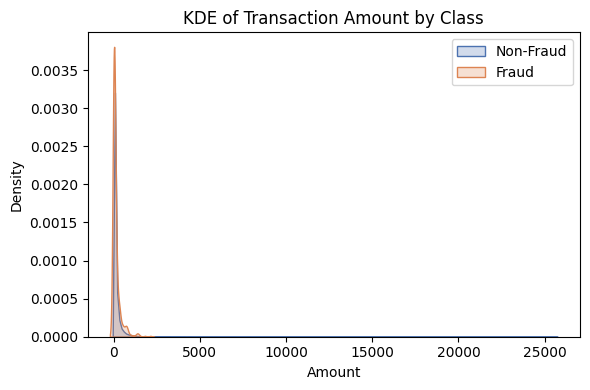

Saved: ..\experiments\figures\time_hist.png


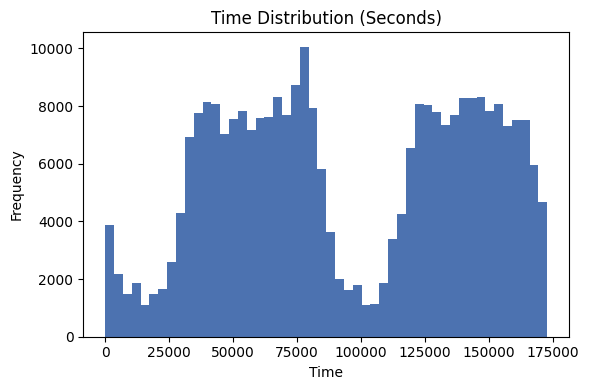

Saved: ..\experiments\figures\correlation_heatmap.png


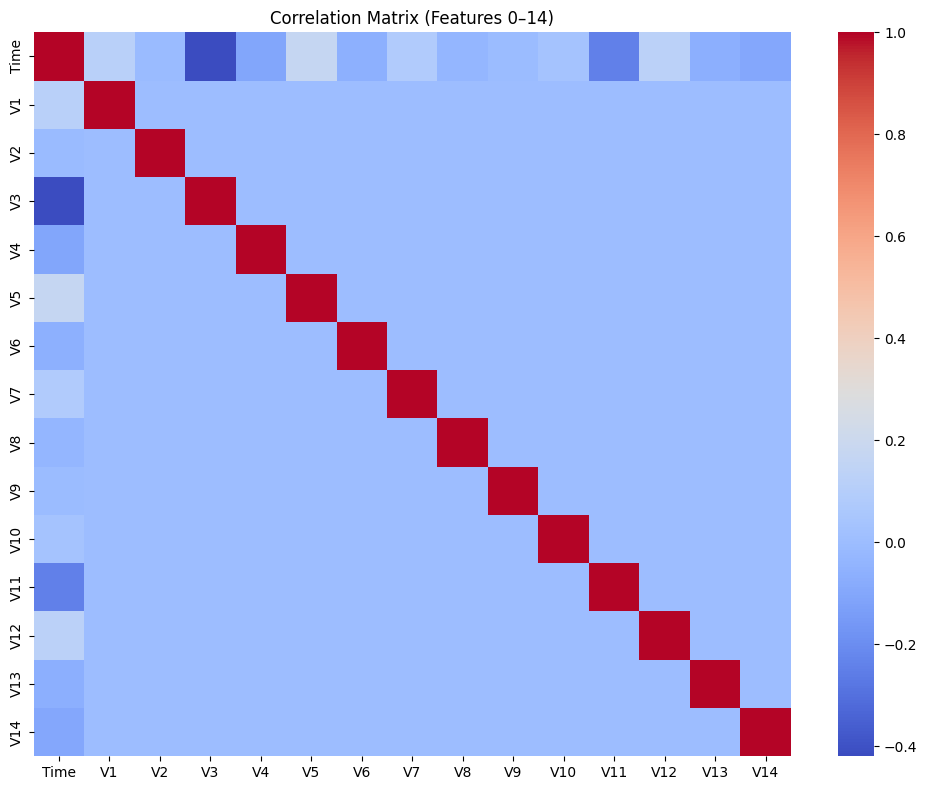

Saved: ..\experiments\figures\amount_boxplot.png


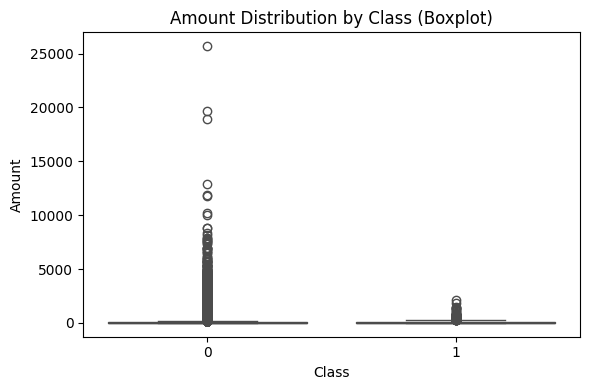

Saved: ..\experiments\figures\txn_per_hour.png


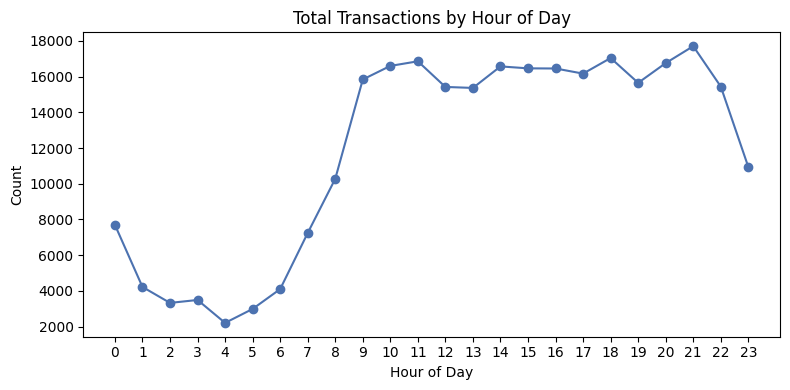

Saved: ..\experiments\figures\fraud_rate_hour.png


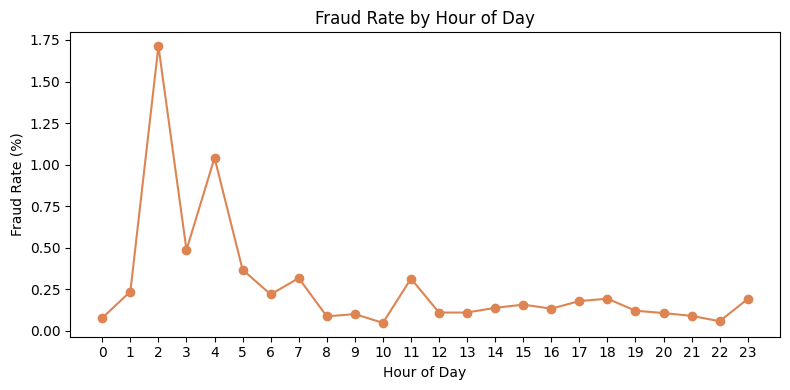

Saved: ..\experiments\figures\pca_scatter.png


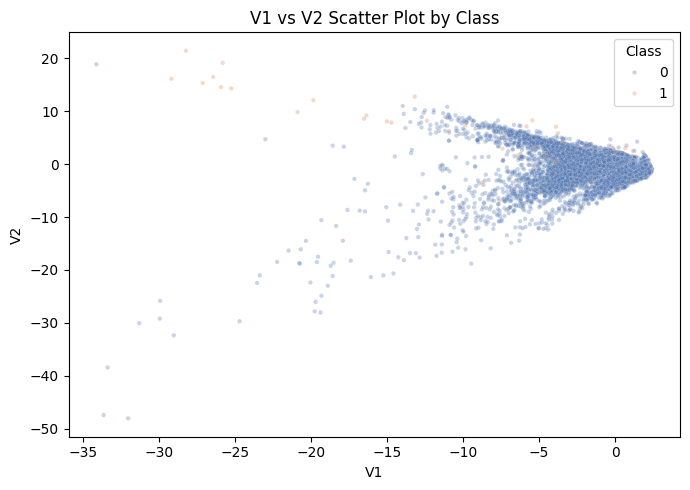

Saved: ..\experiments\figures\amount_outliers.png


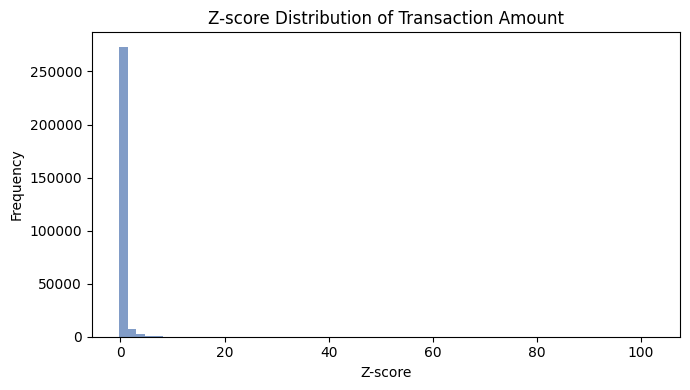

In [92]:
# 1. Class distribution bar plot
plt.figure(figsize=(6,4))
plt.bar(["Non-Fraud", "Fraud"], [counts[0], counts[1]], 
        color=["#4C72B0", "#DD8452"])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.tight_layout()
savefig("class_distribution")
plt.show()


# 2. Class proportion pie plot
plt.figure(figsize=(5,5))
plt.pie([counts[0], counts[1]],
        labels=["Non-Fraud", "Fraud"],
        colors=["#4C72B0", "#DD8452"],
        autopct="%1.2f%%",
        startangle=90)
plt.title("Fraud Proportion")
plt.tight_layout()
savefig("class_pie")
plt.show()


# 3. Amount histogram
plt.figure(figsize=(6,4))
plt.hist(df["Amount"], bins=50, color="#4C72B0")
plt.title("Amount Distribution (Raw)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
savefig("amount_hist")
plt.show()


# 4. Amount KDE (fraud vs non-fraud)
plt.figure(figsize=(6,4))
sns.kdeplot(df[df["Class"] == 0]["Amount"], label="Non-Fraud", fill=True, color="#4C72B0")
sns.kdeplot(df[df["Class"] == 1]["Amount"], label="Fraud", fill=True, color="#DD8452")
plt.title("KDE of Transaction Amount by Class")
plt.xlabel("Amount")
plt.legend()
plt.tight_layout()
savefig("amount_kde")
plt.show()


# 5. Time histogram
plt.figure(figsize=(6,4))
plt.hist(df["Time"], bins=50, color="#4C72B0")
plt.title("Time Distribution (Seconds)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.tight_layout()
savefig("time_hist")
plt.show()


# 6. Correlation heatmap (first 15 columns)
plt.figure(figsize=(10,8))
sns.heatmap(corr_a, cmap="coolwarm", square=False, cbar=True)
plt.title("Correlation Matrix (Features 0–14)")
plt.tight_layout()
savefig("correlation_heatmap")
plt.show()


# 7. Amount boxplot by class
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Class", y="Amount", palette=["#4C72B0", "#DD8452"])
plt.title("Amount Distribution by Class (Boxplot)")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.tight_layout()
savefig("amount_boxplot")
plt.show()


# 8. Transactions per hour
plt.figure(figsize=(8,4))
plt.plot(hour_stats.index, hour_stats["total"], marker="o", color="#4C72B0")
plt.title("Total Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.xticks(range(24))
plt.tight_layout()
savefig("txn_per_hour")
plt.show()


# 9. Fraud rate per hour
plt.figure(figsize=(8,4))
plt.plot(hour_stats.index, hour_stats["fraud_rate"], marker="o", color="#DD8452")
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate (%)")
plt.xticks(range(24))
plt.tight_layout()
savefig("fraud_rate_hour")
plt.show()


# 10. PCA scatter (V1 vs V2)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df.sample(50000, random_state=42),
    x="V1", y="V2",
    hue="Class", palette=["#4C72B0", "#DD8452"],
    alpha=0.3, s=10
)
plt.title("V1 vs V2 Scatter Plot by Class")
plt.tight_layout()
savefig("pca_scatter")
plt.show()


# 11. Amount z-score outliers histogram
plt.figure(figsize=(7,4))
plt.hist(df["Amount_z"], bins=60, color="#4C72B0", alpha=0.7)
plt.title("Z-score Distribution of Transaction Amount")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.tight_layout()
savefig("amount_outliers")
plt.show()
